Load libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

Load data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 100

# MNIST dataset 
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Data loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

Show Example

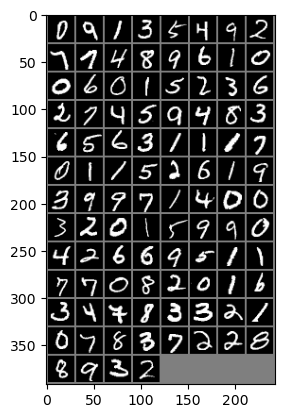

0     9     1     3     5     4     9     2     7     7     4     8     9     6     1     0     0     6     0     1     5     2     3     6     2     7     4     5     9     4     8     3     6     5     6     3     1     1     1     7     0     1     1     5     2     6     1     9     3     9     9     7     1     4     0     0     3     2     0     1     5     9     9     0     4     2     6     6     9     5     1     1     7     7     0     8     2     0     1     6     3     4     7     8     3     3     2     1     0     7     8     3     7     2     2     8     8     9     3     2    


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Neural Network #1

In [4]:
import torch.nn as nn

class ClassificationModel1(nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel1, self).__init__()
        self.layer1 = nn.Linear(input_size, 20)
        self.layer2 = nn.Linear(20, 50)
        self.layer3 = nn.Linear(50, 20)
        self.layer4 = nn.Linear(20, 10)
        self.activation=torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        x = self.activation(x)
        x = self.layer4(x)
        return x


nnet1 = ClassificationModel1(28 * 28) 


In [5]:
from torchinfo import summary

batch_size= 64

summary(nnet1, input_size=(batch_size,1,28,28),device='cpu')

/Users/grad/opt/anaconda3/envs/pt2/lib/python3.8/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/grad/opt/anaconda3/envs/pt2/lib/python3.8/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
ClassificationModel1                     [64, 10]                  --
├─Linear: 1-1                            [64, 20]                  15,700
├─ReLU: 1-2                              [64, 20]                  --
├─Linear: 1-3                            [64, 50]                  1,050
├─ReLU: 1-4                              [64, 50]                  --
├─Linear: 1-5                            [64, 20]                  1,020
├─ReLU: 1-6                              [64, 20]                  --
├─Linear: 1-7                            [64, 10]                  210
Total params: 17,980
Trainable params: 17,980
Non-trainable params: 0
Total mult-adds (M): 1.15
Input size (MB): 0.20
Forward/backward pass size (MB): 0.05
Params size (MB): 0.07
Estimated Total Size (MB): 0.32

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet1.parameters(), lr=0.01)

In [7]:
# Define an empty list to store the loss values
loss_list1 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list1.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.005
Epoch [2/20] loss: 0.003
Epoch [3/20] loss: 0.003
Epoch [4/20] loss: 0.003
Epoch [5/20] loss: 0.003
Epoch [6/20] loss: 0.003
Epoch [7/20] loss: 0.003
Epoch [8/20] loss: 0.003
Epoch [9/20] loss: 0.003
Epoch [10/20] loss: 0.003
Epoch [11/20] loss: 0.003
Epoch [12/20] loss: 0.003
Epoch [13/20] loss: 0.003
Epoch [14/20] loss: 0.002
Epoch [15/20] loss: 0.002
Epoch [16/20] loss: 0.003
Epoch [17/20] loss: 0.002
Epoch [18/20] loss: 0.002
Epoch [19/20] loss: 0.002
Epoch [20/20] loss: 0.002
Finished Training


Accuracy

In [8]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet1(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc1=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 93.1 %


Plot loss

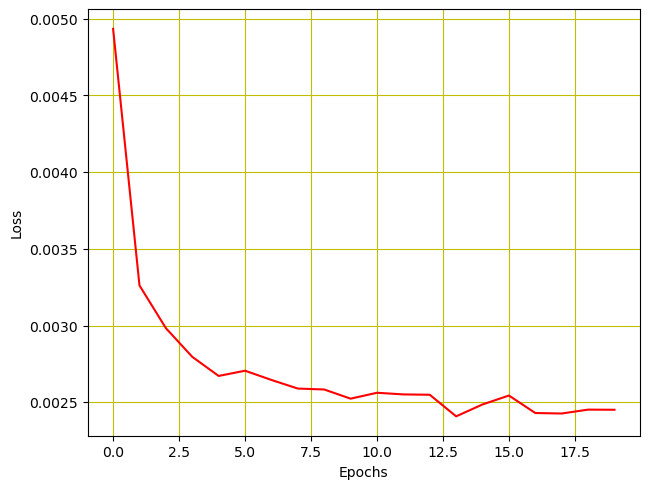

In [9]:
plt.plot(loss_list1, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Neural Network #2

In [10]:
import torch.nn as nn

class ClassificationModel2(nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel2, self).__init__()
        self.layer1 = nn.Linear(input_size, 10)
        self.layer2 = nn.Linear(10, 20)
        self.layer3 = nn.Linear(20, 30)
        self.layer4 = nn.Linear(30, 20)
        self.layer5 = nn.Linear(20,10)
        self.layer6 = nn.Linear(10,10)
        self.activation=torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        x = self.activation(x)
        x = self.layer4(x)
        x - self.activation(x)
        x = self.layer5(x)
        x = self.activation(x)
        z = self.layer6(x)
        
        return x


nnet2 = ClassificationModel2(28 * 28) 


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet2.parameters(), lr=0.01)

In [12]:
# Define an empty list to store the loss values
loss_list2 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list2.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.016
Epoch [2/20] loss: 0.014
Epoch [3/20] loss: 0.007
Epoch [4/20] loss: 0.005
Epoch [5/20] loss: 0.005
Epoch [6/20] loss: 0.005
Epoch [7/20] loss: 0.005
Epoch [8/20] loss: 0.005
Epoch [9/20] loss: 0.005
Epoch [10/20] loss: 0.005
Epoch [11/20] loss: 0.005
Epoch [12/20] loss: 0.004
Epoch [13/20] loss: 0.004
Epoch [14/20] loss: 0.004
Epoch [15/20] loss: 0.004
Epoch [16/20] loss: 0.004
Epoch [17/20] loss: 0.004
Epoch [18/20] loss: 0.004
Epoch [19/20] loss: 0.004
Epoch [20/20] loss: 0.004
Finished Training


Accuracy

In [13]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet2(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc2=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 87.75 %


Plot loss

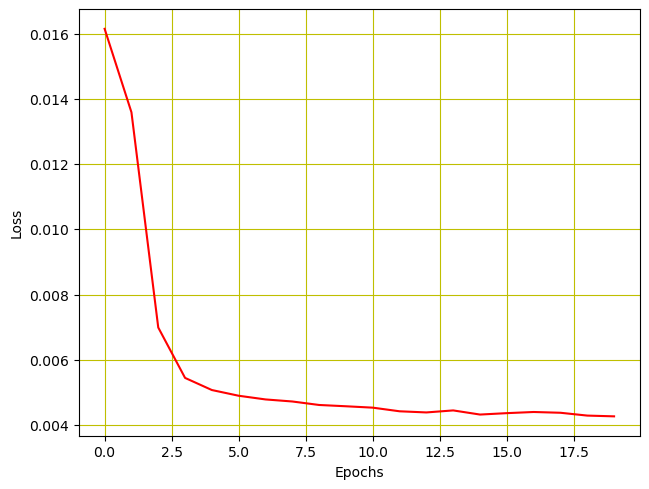

In [14]:
plt.plot(loss_list2, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Neural Network #3

In [15]:
import torch.nn as nn

class ClassificationModel3(nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel3, self).__init__()
        self.layer1 = nn.Linear(input_size, 10)
        self.layer2 = nn.Linear(10, 40)
        self.layer3 = nn.Linear(40, 70)
        self.layer4 = nn.Linear(70, 40)
        self.layer5 = nn.Linear(40,10)
        self.layer6 = nn.Linear(10,10)
        self.activation=torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.activation(x)
        x = self.layer3(x)
        x = self.activation(x)
        x = self.layer4(x)
        x - self.activation(x)
        x = self.layer5(x)
        x = self.activation(x)
        z = self.layer6(x)
        
        return x


nnet3 = ClassificationModel3(28 * 28) 


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(nnet3.parameters(), lr=0.01)

In [17]:
# Define an empty list to store the loss values
loss_list3 = []

epochs=20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get inputs
        inputs, labels = data
        
        # zero parameter gradients
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = nnet3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print
    epoch_loss = running_loss / len(trainset)
    loss_list3.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{epochs}] loss: {epoch_loss:.3f}')
    
print('Finished Training')

Epoch [1/20] loss: 0.021
Epoch [2/20] loss: 0.021
Epoch [3/20] loss: 0.019
Epoch [4/20] loss: 0.018
Epoch [5/20] loss: 0.017
Epoch [6/20] loss: 0.017
Epoch [7/20] loss: 0.016
Epoch [8/20] loss: 0.016
Epoch [9/20] loss: 0.016
Epoch [10/20] loss: 0.016
Epoch [11/20] loss: 0.016
Epoch [12/20] loss: 0.016
Epoch [13/20] loss: 0.016
Epoch [14/20] loss: 0.016
Epoch [15/20] loss: 0.016
Epoch [16/20] loss: 0.016
Epoch [17/20] loss: 0.016
Epoch [18/20] loss: 0.016
Epoch [19/20] loss: 0.016
Epoch [20/20] loss: 0.016
Finished Training


Accuracy

In [18]:
correct =0
total=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs= nnet3(images)

        _, predicted=torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted ==labels).sum().item()
acc3=100*correct/total
print(f'Approx. accuracy of the network: {100*correct/total} %')

Approx. accuracy of the network: 41.2 %


Plot loss

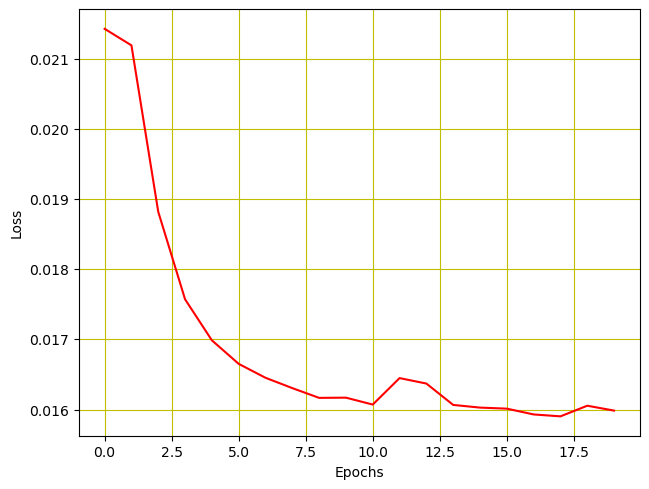

In [19]:
plt.plot(loss_list3, 'r')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Comparison between models

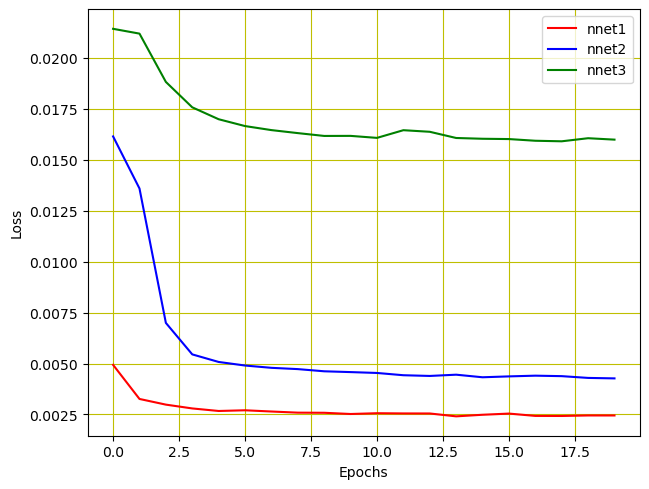

In [20]:
plt.plot(loss_list1, 'r', label='nnet1')
plt.plot(loss_list2, 'b', label='nnet2')
plt.plot(loss_list3, 'g', label='nnet3')
plt.tight_layout()
plt.grid(True,color='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
print("NNet1 Accuracy: ", acc1)
print("NNet2 Accuracy: ", acc2)
print("NNet3 Accuracy: ", acc3)

NNet1 Accuracy:  93.1
NNet2 Accuracy:  87.75
NNet3 Accuracy:  41.2


We are going to answer the following questions:

i) Which of the three models had the least amount of error for validation? 

Taking into consideration the approximate accuracy of each network, and analyzing the graphs, the model nominated ClassificationModel1 has the best results. Note that model ClassificationModel2 has the quickest convergence, but it doesn't reach lower values of loss, like ClassificationModel1. 

ii) How long it took to train each model?

ClassificationModel1: ~1min. with 41sec.

ClassificationModel2: ~1min. with 45sec.

ClassificationModel3: ~1min. with 48sec.



